In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

train = pd.read_csv('./data/train.csv')
test  = pd.read_csv('./data/test.csv')
sub   = pd.read_csv('./data/sample_submission.csv')

train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

train.shape, test.shape, sub.shape

((1350, 14), (1350, 13), (1350, 2))

In [4]:
train.isna().sum()

Overall Qual      0
Gr Liv Area       0
Exter Qual        0
Garage Cars       0
Garage Area       0
Kitchen Qual      0
Total Bsmt SF     0
1st Flr SF        0
Bsmt Qual         0
Full Bath         0
Year Built        0
Year Remod/Add    0
Garage Yr Blt     0
target            0
dtype: int64

In [5]:
test.isna().sum()

Overall Qual      0
Gr Liv Area       0
Exter Qual        0
Garage Cars       0
Garage Area       0
Kitchen Qual      0
Total Bsmt SF     0
1st Flr SF        0
Bsmt Qual         0
Full Bath         0
Year Built        0
Year Remod/Add    0
Garage Yr Blt     0
dtype: int64

In [6]:
train.describe()

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,6.208889,1513.542222,1.870370,502.014815,1082.644444,1167.474074,1.560741,1972.987407,1985.099259,1978.471852,186406.312593
std,1.338015,487.523239,0.652483,191.389956,384.067713,375.061407,0.551646,29.307257,20.153244,25.377278,78435.424758
min,2.000000,480.000000,1.000000,100.000000,105.000000,480.000000,0.000000,1880.000000,1950.000000,1900.000000,12789.000000
25%,5.000000,1144.000000,1.000000,368.000000,816.000000,886.250000,1.000000,1955.000000,1968.000000,1961.000000,135000.000000
50%,6.000000,1445.500000,2.000000,484.000000,1009.000000,1092.500000,2.000000,1976.000000,1993.000000,1978.500000,165375.000000
75%,7.000000,1774.500000,2.000000,588.000000,1309.500000,1396.500000,2.000000,2002.000000,2004.000000,2002.000000,217875.000000
max,10.000000,4476.000000,5.000000,1488.000000,2660.000000,2898.000000,4.000000,2010.000000,2010.000000,2207.000000,745000.000000


In [7]:
train.dtypes

Overall Qual       int64
Gr Liv Area        int64
Exter Qual        object
Garage Cars        int64
Garage Area        int64
Kitchen Qual      object
Total Bsmt SF      int64
1st Flr SF         int64
Bsmt Qual         object
Full Bath          int64
Year Built         int64
Year Remod/Add     int64
Garage Yr Blt      int64
target             int64
dtype: object

In [17]:
numeric_feature = train.select_dtypes(exclude=object).columns
categorical_feature = train.select_dtypes(object).columns

print(list(numeric_feature))
print(list(categorical_feature))

['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'target']
['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']


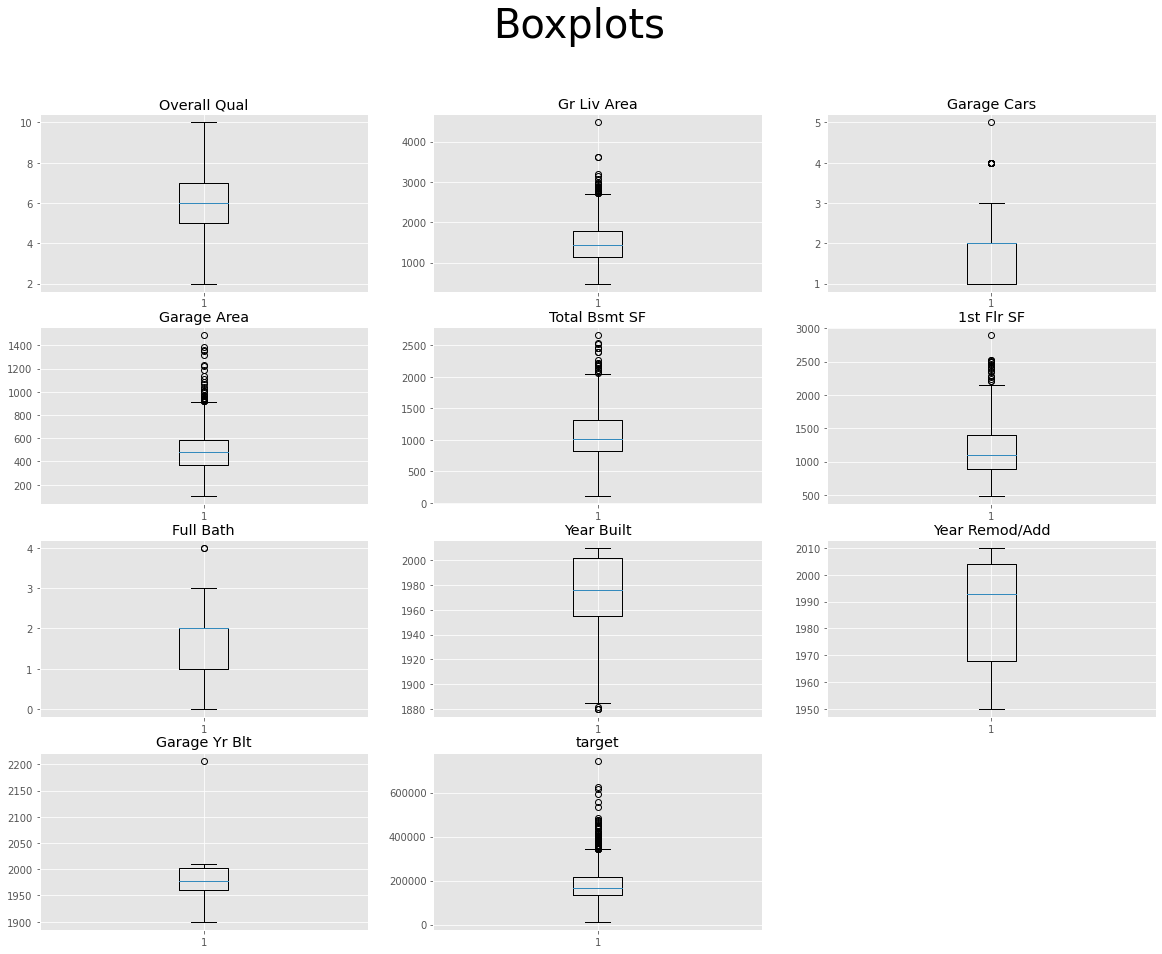

In [19]:
plt.style.use('ggplot')

plt.figure(figsize=(20, 15))
plt.suptitle('Boxplots', fontsize=40)

for i in range(len(numeric_feature)):
    plt.subplot(4, 3, i + 1)
    plt.title(numeric_feature[i])
    plt.boxplot(train[numeric_feature[i]])
plt.show()

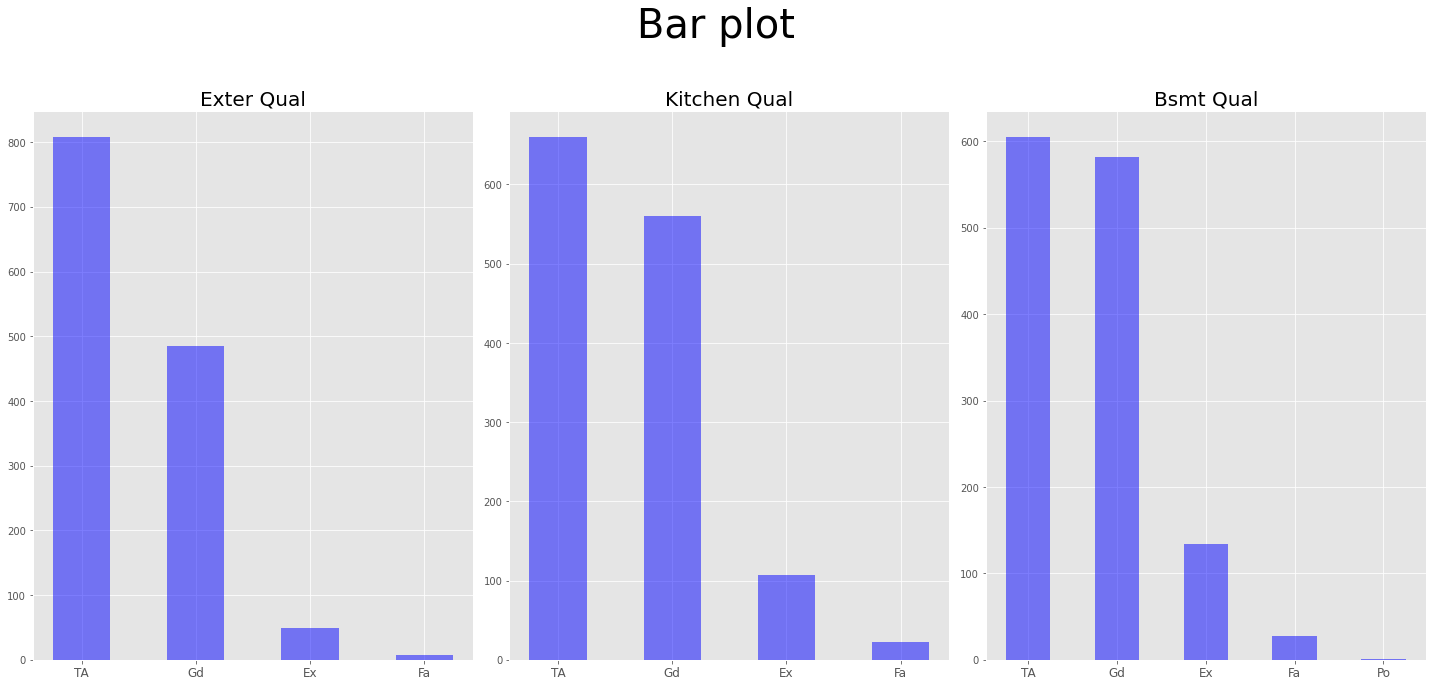

In [26]:
plt.figure(figsize=(20, 10))
plt.suptitle('Bar plot', fontsize=40)

for i in range(len(categorical_feature)):
    plt.subplot(1, 3, i + 1)
    plt.title(categorical_feature[i], fontsize=20)
    temp = train[categorical_feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [32]:
corr_df = train.copy()
corr_cols = corr_df.select_dtypes(object).columns
corr_df[corr_cols] = corr_df[corr_cols].astype(str).apply(LabelEncoder().fit_transform)

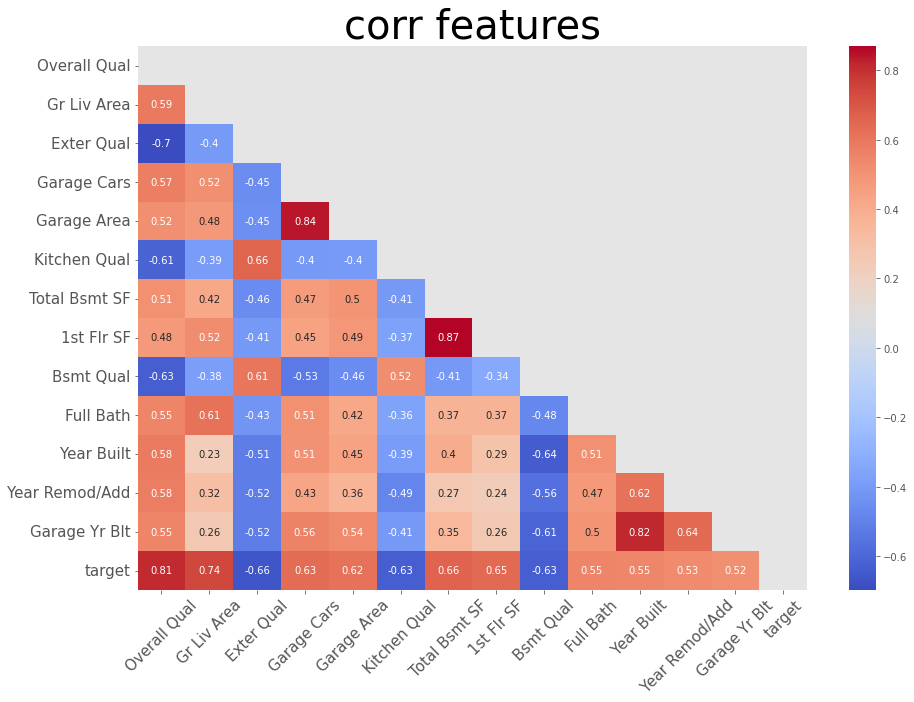

In [33]:
plt.figure(figsize=(15, 10))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True

heatmap_ax = sns.heatmap(heat_table, annot=True, mask=mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('corr features', fontsize=40)
plt.show()

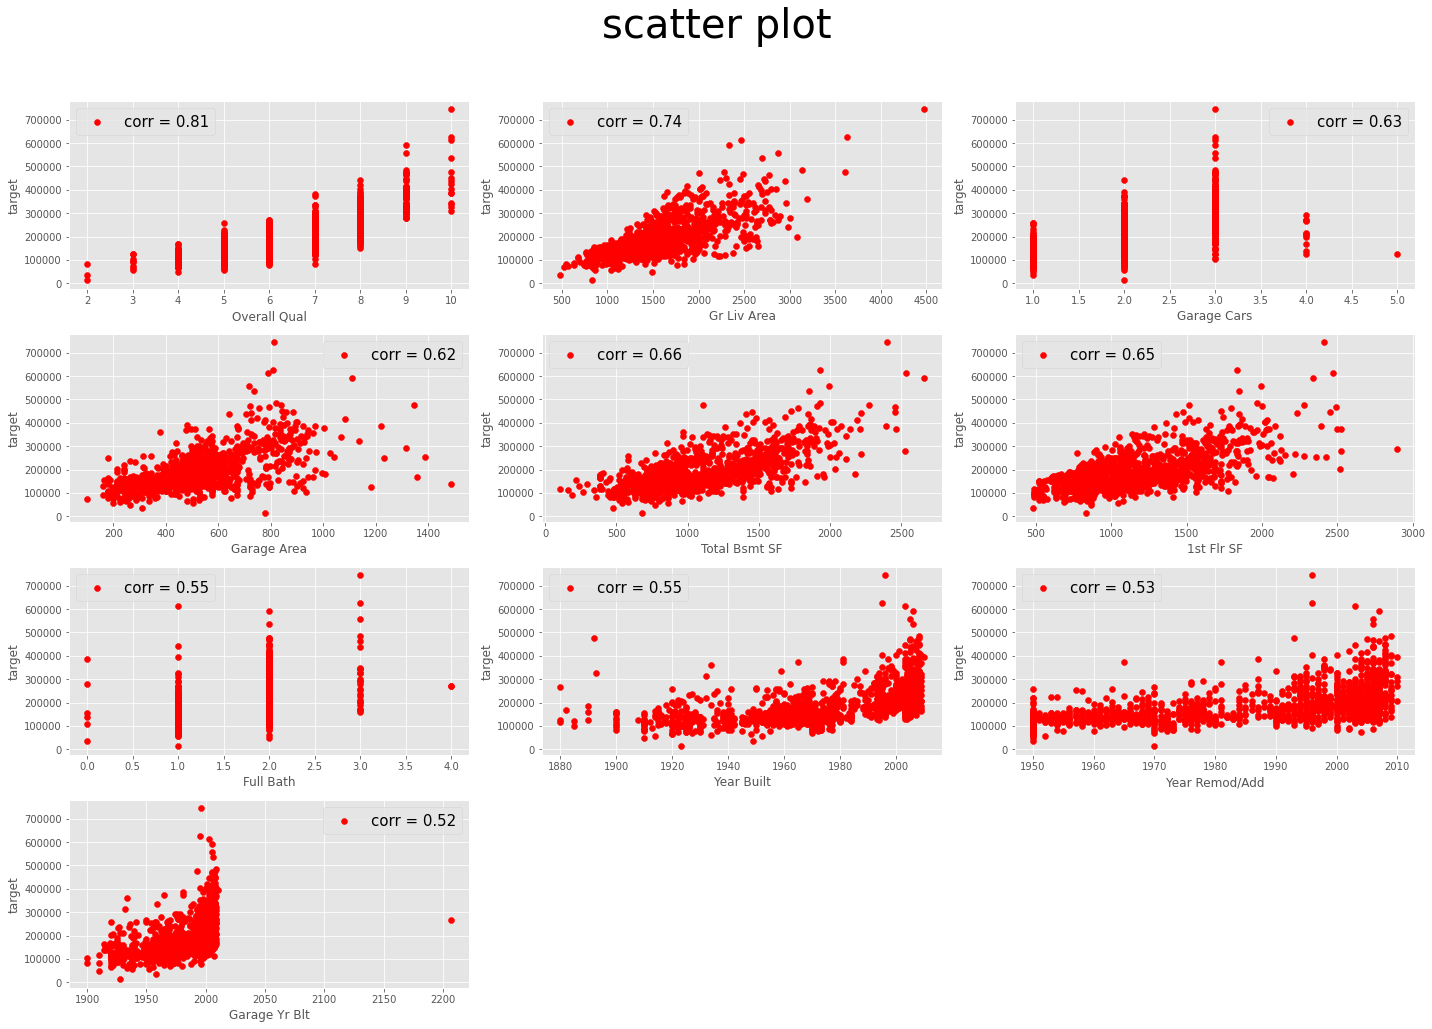

In [34]:
plt.figure(figsize=(20, 15))
plt.suptitle('scatter plot', fontsize=40)

for i in range(len(numeric_feature[:-1])):
    plt.subplot(4, 3, i + 1)
    plt.xlabel(numeric_feature[i])
    plt.ylabel('target')
    corr_score = train[[numeric_feature[i], 'target']].corr().iloc[0, 1].round(2)
    c = 'red' if corr_score > 0 else 'blue'
    plt.scatter(train[numeric_feature[i]], train['target'], color=c, label=f'corr = {corr_score}')
    plt.legend(fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

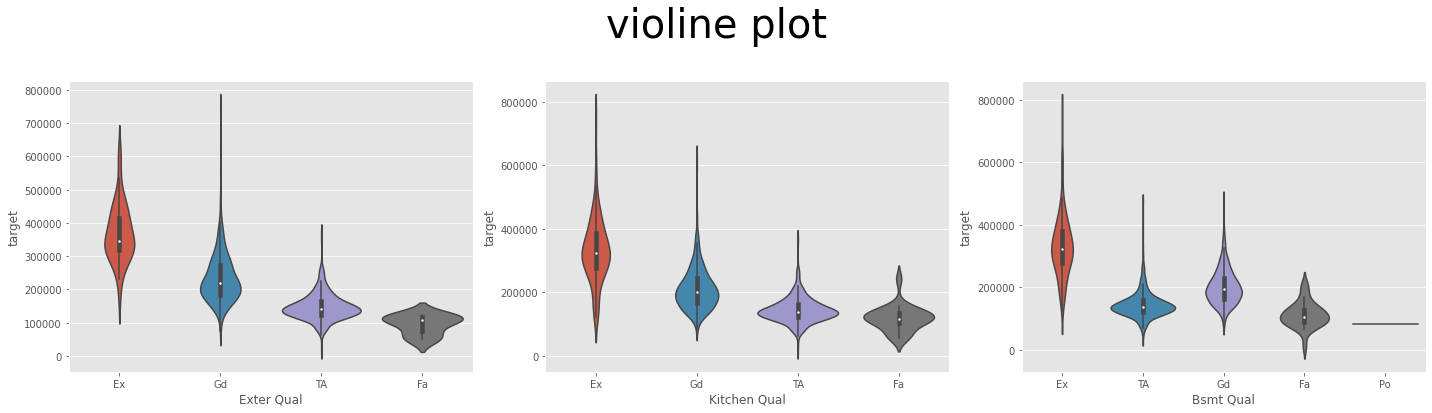

In [36]:
plt.figure(figsize=(20, 6))
plt.suptitle('violine plot', fontsize=40)

for i in range(len(categorical_feature)):
    plt.subplot(1, 3, i + 1)
    plt.xlabel(categorical_feature[i])
    plt.ylabel('target')
    sns.violinplot(x=train[categorical_feature[i]], y=train['target'])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()